In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

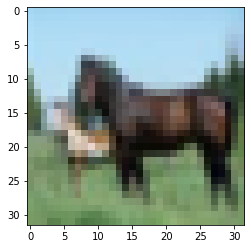

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [12]:
y_test[0]

array([3], dtype=uint8)

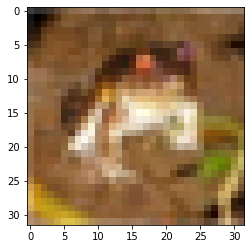

In [13]:
plt.imshow(x_train[0])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop= EarlyStopping(monitor='val_loss', patience=2)

In [19]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 18s 368us/sample - loss: 1.5149 - accuracy: 0.4529 - val_loss: 1.3022 - val_accuracy: 0.5417
Epoch 2/15
50000/50000 [==============================] - 13s 252us/sample - loss: 1.1745 - accuracy: 0.5859 - val_loss: 1.1190 - val_accuracy: 0.6013
Epoch 3/15
50000/50000 [==============================] - 12s 244us/sample - loss: 1.0330 - accuracy: 0.6402 - val_loss: 1.0310 - val_accuracy: 0.6406
Epoch 4/15
50000/50000 [==============================] - 12s 244us/sample - loss: 0.9314 - accuracy: 0.6752 - val_loss: 1.0190 - val_accuracy: 0.6452
Epoch 5/15
50000/50000 [==============================] - 12s 246us/sample - loss: 0.8456 - accuracy: 0.7066 - val_loss: 0.9929 - val_accuracy: 0.6592
Epoch 6/15
50000/50000 [==============================] - 12s 244us/sample - loss: 0.7671 - accuracy: 0.7309 - val_loss: 0.9782 - val_accuracy: 0.6700
Epoch 7/15
50000/50000 [====================

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.514925,0.45286,1.302193,0.5417
1,1.174548,0.58590,1.119015,0.6013
2,1.033025,0.64022,1.030975,0.6406
3,0.931365,0.67520,1.018981,0.6452
4,0.845638,0.70656,0.992859,0.6592
5,0.767130,0.73086,0.978237,0.6700
6,0.695292,0.75512,0.989834,0.6750
7,0.635984,0.77822,1.021695,0.6743


In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

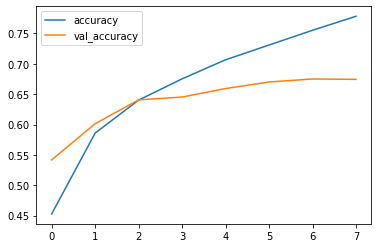

In [23]:
metrics[['accuracy','val_accuracy']].plot()

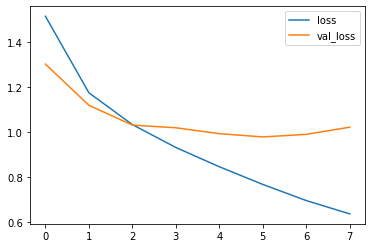

In [24]:
metrics[['loss', 'val_loss']].plot()

In [25]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 161us/sample - loss: 1.0217 - accuracy: 0.6743


[1.021695499420166, 0.6743]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
predictions = model.predict_classes(x_test)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      1000
           1       0.77      0.82      0.79      1000
           2       0.54      0.61      0.57      1000
           3       0.55      0.37      0.44      1000
           4       0.70      0.58      0.64      1000
           5       0.56      0.60      0.58      1000
           6       0.64      0.84      0.73      1000
           7       0.83      0.65      0.73      1000
           8       0.81      0.74      0.78      1000
           9       0.76      0.73      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



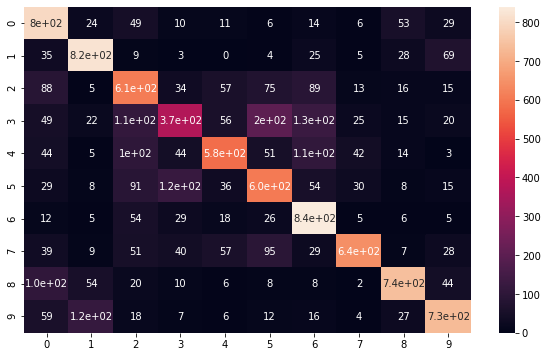

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

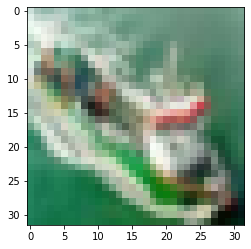

In [30]:
index = 15
single_image = x_test[index]
plt.imshow(single_image)

In [31]:
y_test[index]

array([8], dtype=uint8)

In [32]:
prediction = model.predict_classes(single_image.reshape(1,32,32,3))
print (prediction)

[8]


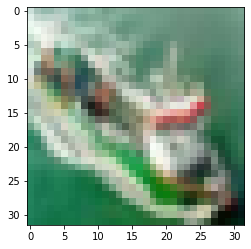

In [33]:
plt.imshow(single_image)
import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# This method only requires the image to explain and the model's predict function, which is what allows it to be model-agnostic
explanation = explainer.explain_instance(single_image, model.predict)

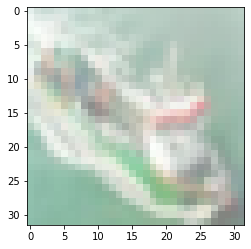

In [34]:
from skimage.segmentation import mark_boundaries
# Get image and mask shows us the superpixels that the model found to be
# most relevant to making a prediction
# The argument with the value of 1 in this method is the class that we want LIME to explain
# temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True, num_features = 5)
temp, mask = explanation.get_image_and_mask(8, positive_only=True, negative_only=False, hide_rest=True, num_features = 5, min_weight=0.0)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

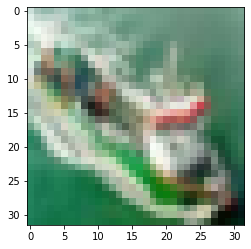

In [35]:
plt.imshow(temp)

In [36]:
import shap
import numpy as np


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


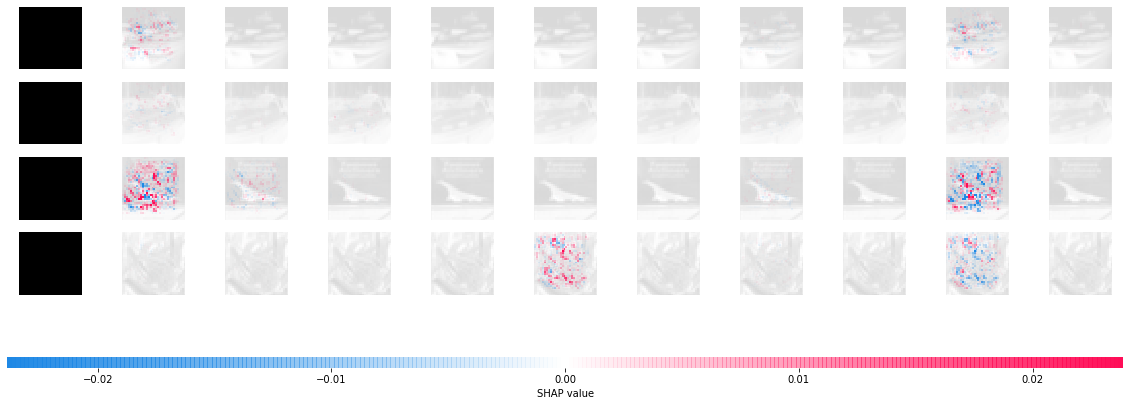

In [37]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, single_image.reshape(1,32,32,3))
shap_values = e.shap_values(x_test[1:5])
shap.image_plot(shap_values, -x_test[1:5])

In [38]:
x_train.shape[0]

50000

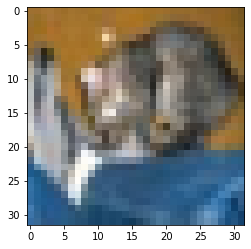

In [49]:
plt.imshow(x_test[0:5][0])

In [ ]:
plt.imshow(x_test[0].shape)